# Introduction to Colocalisation Analysis with Python.


Dominic Waithe 2019 (c)

Exercise: To demonstrate and utilise the different colocalisation techniques.  Furthermore to use colocalisation to assess the quality of registration.

Instructions:  
Work through the notebook cell-by-cell. Where you see TODO, this means you need to do something. Optional TODO means you should do it if you are finding things too easy and have enough time.
Many of the exercises below utilise the Skimage Python library, if in doubt, google the function names, to find out additional description.
Some of the cells also involve plotting. If you are having trouble understanding the plotting with Matplotlib, then I recommend the following text: https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

In [1]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float,color, img_as_ubyte
from skimage import color, io
from skimage.filters import threshold_otsu
import scipy
import numpy as np

### The Mander's test
Exercise: We want to implement the Mander's test and calculate the value for the image.
CHB = CH1 & CH2 (& is the 'and' operator. If a pixel is true in both images, it is true in the output).
M1 = CHB/CH1, M2 = CHB/CH2 (The Mander's coefficients).

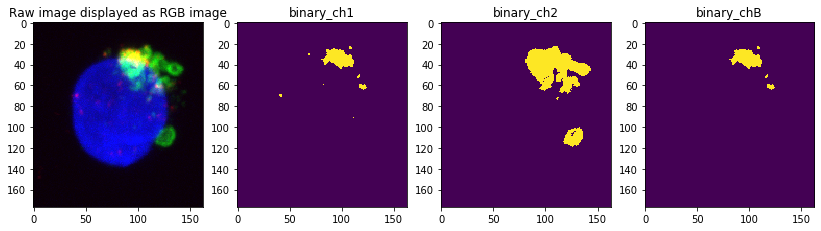

In [21]:
#import Mander's example.
img = io.imread('images/C5aR_LAMP-1_cell003.tif')


#Convert image to float.
img = img_as_float(img)
#Split channels.
img_dapi = img[:,:,2]
img_ch1 = img[:,:,0]
img_ch2 = img[:,:,1]

#Calculate thresholds
thr_ch1 = threshold_otsu(img_ch1)
thr_ch2 = threshold_otsu(img_ch2)

#Apply thresholds and generate binary images.
binary_ch1 = img_ch1 > thr_ch1
binary_ch2 = img_ch2 > thr_ch2

binary_chB = binary_ch1 & binary_ch2


#TODO:
#Calculate the Mander's coefficient for the two channels. Note the formula's above in the description. 
#M1 = np.sum(binary_chB)/np.sum(binary_ch1)
#M2 = np.sum(binary_chB)/np.sum(binary_ch2)

#print("M1",M1)
#print("M2",M2)


fig, ax = plt.subplots(1,4, figsize=(14, 4))
ax[0].imshow(img)
ax[0].set_title("Raw image displayed as RGB image", fontsize=12)

ax[1].imshow(binary_ch1)
ax[1].set_title("binary_ch1", fontsize=12)
ax[2].imshow(binary_ch2)
ax[2].set_title("binary_ch2", fontsize=12)

ax[3].imshow(binary_chB)
ax[3].set_title("binary_chB", fontsize=12);

### Correlation

We start with two lists of numbers (or two vectors or arrays as they are known). Please find the dot product of the two vectors. The dot product formula is a follows:<img src="src/dotProduct.png">

In python there is more than one way to find the dot product of two vectors. It can be performed using 'for loops' or through vectorised notation

In [3]:
#This line is very important: (It turns on the inline visuals!)
%pylab inline
a = [2,9,32,12,14,6,9,23,4,5,13,6,7,92,21,45];
b = [7,21,4,2,92,9,9,6,13,12,45,5,6,23,14,32];

#TODO:
#Please calculate the dot product of the vectors 'a' and 'b'.
#You may use any method you like. If get stuck. Check:
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
#If you rearrange the numbers in 'b', what sequence will give
#the highest dot-product magnitude?

Populating the interactive namespace from numpy and matplotlib


### The Pearson's test


Exercise: See the similarities

The above example shows you how two number sequences can be compared with nothing more complicated than by using the dot product. This works as long as the sequences comprise of the same numbers but in a shuffled order.  To compare different sequences with the original we normalise by the magnitude of the vectors. To include this step. We use a more complicated equation:
<img src="src/eqn_full.gif">

https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient
https://en.wikipedia.org/wiki/Cross-correlation

Hopefully you can see the top of this equation is very similar to the dot-product, except that it is centered on zero (subtraction of the mu, the mean) and the variance is normalised (division by standard deviation).

Because the equation is normalised, a perfectly correlated sequence yeilds a rho value of 1.0. A perfectly random comparison yields 0 and two anti-correlated sequences will yield a value of -1.0.


### Pearson's comparison of microscopy derived images
In this image. We have channels in order 0) CFP-Gamma7 1) Dextran Far-Red 2) Bright-field channel 3) EEA1 Texas-Red.

image dimensions (512, 512, 4)  im dtype: uint8


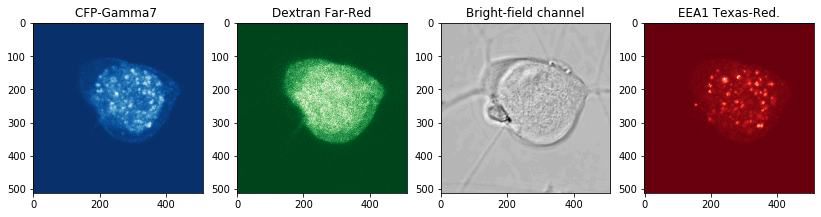

In [20]:
#Here is an image which has 4 channels.

img = io.imread('images/neuron.tif')
print('image dimensions',img.shape, ' im dtype:',img.dtype)
img = img_as_float(img)


fig, ax = plt.subplots(1,4, figsize=(14, 4))
ax[0].imshow(img[:,:,0],cmap='Blues_r')
ax[0].set_title('CFP-Gamma7 ')
ax[1].imshow(img[:,:,1],cmap='Greens_r')
ax[1].set_title('Dextran Far-Red')
ax[2].imshow(img[:,:,2],cmap='Greys_r')
ax[2].set_title('Bright-field channel')
ax[3].imshow(img[:,:,3],cmap='Reds_r')
ax[3].set_title('EEA1 Texas-Red.');

In [5]:
#Calculate the Pearson's coefficent (rho) for the image channel 0, 3.
X = img[:,:,0].reshape(-1)
Y = img[:,:,3].reshape(-1)

X_bar = np.average(X)
Y_bar = np.average(Y)
rho = np.sum((X-X_bar)*(Y-Y_bar))/(np.sqrt(np.sum((X-X_bar)**2))*np.sqrt(np.sum((Y-Y_bar)**2)))

#You should hopefully obtain a value 0.829
print('rho',rho)



rho 0.829104646364742


### Masked image.
You can threshold an image, preferably an independent channel, and then use this to mask your input data.

In [6]:
#The mask channel is a dextran dye which was injected into the cell.
msk = img[:,:,1]
#Lets threshold it with Otsu.
thr_ch1 = threshold_otsu(msk)
binary_mask = msk>thr_ch1

#Now we want the pixel indices which are positive in the image.
msk_indices = np.where(binary_mask)[0]
X_m = X[msk_indices]
Y_m = Y[msk_indices]

#TODO: Calculate Rho for these pixels.
#What do you notice about the Pearson's coefficient value relative to that calculated on all the values?


shape of img:  (2, 167, 261) bit-depth:  float64


Text(0.5, 1.0, 'RGB overlay')

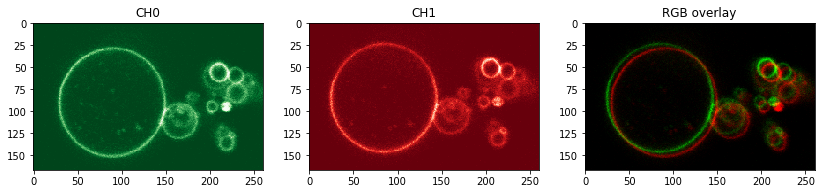

In [17]:
#from tifffile import imread as imreadtiff
img = io.imread('images/composite.tif')
img =  img_as_float(img)

#The organisation of this file is not simple. It is also a 16-bit image.
print("shape of img: ",img.shape,"bit-depth: ",img.dtype)

#We can assess the image data like so.
CH0 = img[0,:,:]
CH1 = img[1,:,:]

fig, ax = plt.subplots(1,3, figsize=(14, 4))
#Single channels visualisation can handle 16-bit
ax[0].imshow(CH0,cmap='Greens_r')
ax[0].set_title('CH0')
ax[1].imshow(CH1,cmap='Reds_r');
ax[1].set_title('CH1')
#For the display, RGB needs to be three channel.
imRGB = np.zeros((CH0.shape[0],CH0.shape[1],3))
imRGB[:,:,0] = CH0
imRGB[:,:,1] = CH1
ax[2].imshow(imRGB);
ax[2].set_title('RGB overlay')

#TODO: What is the Pearson's value of this image?


In [10]:
#Optional TODO:
#Exercise: The above image is not registered. 
#Can you devise a way of registering this image using the Pearson's test, as a measure for the similarity of the image in different positions. 
#hint you will need to move one of the images relative to the other and measure the colocalisation in this position. 
#The best localisation will have the highest rho value. Produce an image of your fully registered image.
rho_max = 0
#This moves one of your images with respect to the other.
for c in range(1,40):
    for r in range(1,40):
        #We need to dynamically sample our image.
        temp = CH0[c:-40+c,r:-40+r].reshape(-1);
        #The -40 makes sure they are the same size.
        ref = CH1[:-40,:-40].reshape(-1);
        
        rho = np.dot(temp-np.average(temp),ref-np.average(ref))/sqrt(((np.dot(temp-np.average(temp),temp-np.average(temp)))*np.dot(ref-np.average(ref),ref-np.average(ref))))
        
        #You will need to work out the highest rho value is recorded.
        #You will then need to find the coordinates of this high rho.
        #You will then need to provide a visualisation with the image translated.

In [11]:
#Advanced Optional TODO:
#In the above example, the registration is done on the integer level. In normal situations we use subpixel precision location.
#Repeat the above example using the following function to sample the pixels at a sub-pixel level.
padded_CH0 = np.pad(CH0,20)#This time we pad. to accomodate the shifts within our image.
padded_CH1 = np.pad(CH1,20)
temp = padded_CH0
g_x, g_y = np.mgrid[0:temp.shape[0], 0:temp.shape[1]] #The coordinates of our image.
grid_x, grid_y = np.mgrid[0:temp.shape[0]:1, 0:temp.shape[1]:1] #The grid which we want to sample.
#Loop around the below, and correlate..
shift_x = 0.1 #For example.
shift_y = 20.5 #For example.
shifted_img = scipy.interpolate.griddata(np.array([g_x.reshape(-1), g_y.reshape(-1)]).T,temp.reshape(-1), (grid_x+shift_x, grid_y+shift_y), method='linear',fill_value =0.0)


Dominic Waithe 2019 (c)